In [1]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score
import json
from sklearn.svm import SVC  
from IPython.display import SVG
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.utils import resample
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
#inline plotting
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline,make_pipeline
import nltk
from nltk.corpus import stopwords
import re
import sklearn as sk
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,make_scorer,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import resample

In [2]:
#Load Dataset for tweet and tag 
def Load_data(path):
    with open(path) as json_data:
        data=json.load(json_data)
    new_data = []
    for item in data:
        new_entry = {}
        for k,v in item.items():
        # a dictionary will return True for isinstance(v, dict)
            if not isinstance(v, dict):
            # v is not a dictionary here
                new_entry[k] = v
            else:
            # v is a dictionary, so we flatten it
                 for a,b in v.items():
                     new_entry[a] = b
        new_data.append(new_entry)
    return pd.DataFrame(new_data)

In [3]:
path = 'Dataset.json'
tweet=Load_data(path)

# Preprocessing

### first  clean process to text then apply snowball Stremmer

#### Preprocessing

In [4]:
def processTweet1(tweet):
    # Remove HTML special entities (e.g. &)
    tweet = re.sub(r'\&\w*;', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    tweet=re.sub("[^a-zA-Z]"," ",tweet)
    return tweet

In [5]:
tweet['strong_pro1'] = tweet['text'].apply(processTweet1)
tweet.head(n=254)

,tag,text,strong_pro1
0,real,Exclusive: Aramco agrees on price for Sabic ac...,exclusive aramco agrees price for sabic acqui...
1,real,#Digitisation contract signed in #SaudiArabia ...,contract signed for two holy mosques
2,fake,The #Taliban will not attend planned peace tal...,the will not attend planned peace talks with t...
3,real,#Qatar have used #Khashoggi to write all of th...,have used write all the articles beside using ...
4,real,#Saudi sets clear rules and regulations to pro...,sets clear rules and regulations protect wildl...
5,real,#Saudi ministry of justice works on developing...,ministry justice works developing commercial j...
6,fake,#فتاه_تايلند\nA #Saudi woman who’s trying to f...,woman who trying flee into asylum being held...
7,real,#Saudi woman detained in #Thailand seeks asylu...,woman detained seeks asylum she sought asylu...
8,real,Saudi Government paid SR 6million blood money...,saudi government paid million blood money rel...
9,fake,Gunfire Heard At Saudi Royal Palace In Riyadh ...,gunfire heard saudi royal palace riyadh rumors...


In [6]:
stemmer=SnowballStemmer("english")

Snowball Stemmer

In [7]:
ps = SnowballStemmer("english")
tweet['Stemming'] = tweet['strong_pro1'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))


In [8]:
tweet.head()

,tag,text,strong_pro1,Stemming
0,real,Exclusive: Aramco agrees on price for Sabic ac...,exclusive aramco agrees price for sabic acqui...,exclus aramco agre price for sabic acquisit
1,real,#Digitisation contract signed in #SaudiArabia ...,contract signed for two holy mosques,contract sign for two holi mosqu
2,fake,The #Taliban will not attend planned peace tal...,the will not attend planned peace talks with t...,the will not attend plan peac talk with the ar...
3,real,#Qatar have used #Khashoggi to write all of th...,have used write all the articles beside using ...,have use write all the articl besid use him fo...
4,real,#Saudi sets clear rules and regulations to pro...,sets clear rules and regulations protect wildl...,set clear rule and regul protect wildlif the k...


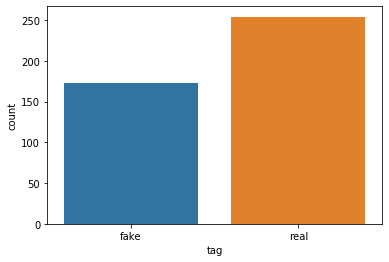

In [9]:
#increase minority class
# 1=fake tag,0= real tag
import seaborn as sns


s = tweet.copy()
df_minority = s[s.tag == "real"]
df_majority = s[s.tag == "fake"]


df_minority = resample(df_minority, 
                       replace=True,  #sample with replacement 
                       #n_samples=len(df_majority),
                       n_samples=254, #to match majority class 
                       random_state=123 #reproducible results
                      )

df_balanced = pd.concat([df_majority, df_minority])
sns.countplot(df_balanced['tag'], label="count")


#ax.set (ylabel="Count")
plt.show()

# pipeline

# 2 pipeline will be tested
First: pipeline consist of BoW(CountVectorizer( )) + Classifier

Second: pipeline consist ofTf-Idf (TfidfVectorizer( ))  + classifier.

Four experiments per classifier

First-  BoW + Preprocessed text 

Second- BoW+ Preprocessed text + Stemming 

Third-  Tf-Idf+ Preprocessed text 

Fourth- Tf-Idf + Preprocessed text + Stemming 

In all experiments split the data 25% / 75% and the value of fold cv = 5 and the random_state=42. To make the split will be always the same, and make sure to get reproducible results,

# Kneighbors Classifier

Exp1: Bow + Preprocessed text

In [12]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

tags = []
for tag in y:
    if tag == 'real':
        tags.append(1)
    if tag == 'fake':
        tags.append(0)
y = tags
#print ("tags in binary:", y)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier())])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_neighbors':range(1,30)
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                      

In [13]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbo

In [14]:
confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = sk.metrics.roc_curve(Y_test, y_pred)
roc_auc = sk.metrics.auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[21 22]
 [ 4 60]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.73      0.94      0.82        64

    accuracy                           0.76       107
   macro avg       0.79      0.71      0.72       107
weighted avg       0.78      0.76      0.74       107
 

Train Accuracy 1.0
Test Accuracy: 0.7570093457943925
roc_auc_score 0.7129360465116279


In [15]:
# plot represents the classifier accuracy and shows that the highest accuracy is as shown by gridSearchCv
K_rang=range(1,30)
K_score=[]
for k in K_rang:
    pipelineTf_Idf = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 2))),
    ('classifier', KNeighborsClassifier(k))])
    
    model=pipelineTf_Idf.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    K_score.append(accuracy_score(Y_test, y_pred))
for i in K_score:
    print(i)

0.7289719626168224
0.719626168224299
0.7009345794392523
0.6635514018691588
0.6822429906542056
0.6822429906542056
0.6728971962616822
0.6915887850467289
0.6728971962616822
0.6728971962616822
0.6448598130841121
0.6448598130841121
0.6448598130841121
0.6448598130841121
0.6261682242990654
0.6355140186915887
0.616822429906542
0.616822429906542
0.6074766355140186
0.6074766355140186
0.6074766355140186
0.6074766355140186
0.6074766355140186
0.6074766355140186
0.5981308411214953
0.5981308411214953
0.5981308411214953
0.5981308411214953
0.5981308411214953


Text(0, 0.5, 'cross-valdition Accuracy')

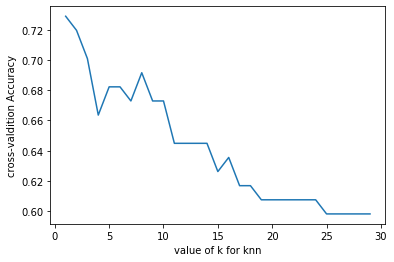

In [16]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")



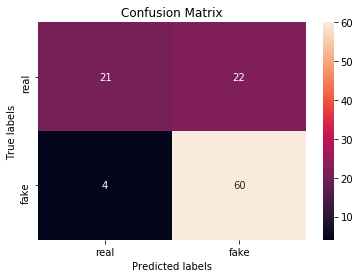

In [17]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp2: Bow + Preprocessed text +Stemming


In [18]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

tags = []
for tag in y:
    if tag == 'real':
        tags.append(1)
    if tag == 'fake':
        tags.append(0)
y = tags
#print ("tags in binary:", y)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier())])


In [19]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_neighbors':range(1,30)
}

In [20]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                      

In [21]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbo

In [22]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = sk.metrics.roc_curve(Y_test, y_pred)
roc_auc = sk.metrics.auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")

print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[21 22]
 [ 4 60]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.73      0.94      0.82        64

    accuracy                           0.76       107
   macro avg       0.79      0.71      0.72       107
weighted avg       0.78      0.76      0.74       107
 

Train Accuracy 1.0
Test Accuracy: 0.7570093457943925
roc_auc_score 0.7129360465116279


In [23]:
# plot represents the classifier accuracy and shows that the highest accuracy is as shown by gridSearchCv
K_rang=range(1,30)
K_score=[]
for k in K_rang:
    pipelineTf_Idf = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 2))),
    ('classifier', KNeighborsClassifier(k))])
    
    model=pipelineTf_Idf.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    K_score.append(accuracy_score(Y_test, y_pred))
for i in K_score:
    print(i)

0.719626168224299
0.719626168224299
0.7102803738317757
0.6915887850467289
0.6822429906542056
0.6822429906542056
0.6728971962616822
0.6915887850467289
0.6728971962616822
0.6728971962616822
0.6728971962616822
0.6728971962616822
0.6542056074766355
0.6728971962616822
0.6355140186915887
0.6355140186915887
0.6355140186915887
0.6355140186915887
0.616822429906542
0.616822429906542
0.6074766355140186
0.6261682242990654
0.6074766355140186
0.6261682242990654
0.6074766355140186
0.6261682242990654
0.5981308411214953
0.5981308411214953
0.5981308411214953


Text(0, 0.5, 'cross-valdition Accuracy')

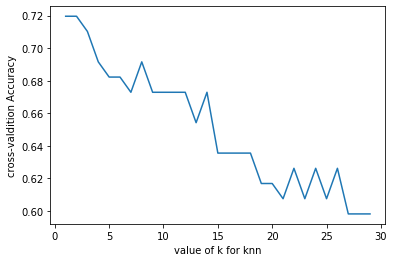

In [24]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")



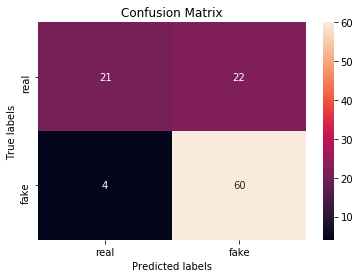

In [25]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp3- Tf-Idf+ Preprocessed text 


In [35]:

x=df_balanced["strong_pro1"]
y=df_balanced['tag']

tags = []
for tag in y:
    if tag == 'real':
        tags.append(1)
    if tag == 'fake':
        tags.append(0)
y = tags
#print ("tags in binary:", y)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier())])


In [31]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_neighbors':range(1,30)
}

In [32]:

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                    

In [33]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', me

In [89]:

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = sk.metrics.roc_curve(Y_test, y_pred)
roc_auc = sk.metrics.auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

ValueError: Data is not binary and pos_label is not specified

In [321]:
# plot represents the classifier accuracy and shows that the highest accuracy is as shown by gridSearchCv
K_rang=range(1,30)
K_score=[]
for k in K_rang:
    pipelineTf_Idf = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 1))),
    ('classifier', KNeighborsClassifier(k))])
    
    model=pipelineTf_Idf.fit(X_train,Y_train)
    y_pred = model .predict(X_test)

    K_score.append(accuracy_score(Y_test, y_pred))
for i in K_score:
    print(i)

0.6644736842105263
0.9078947368421053
0.8947368421052632
0.8355263157894737
0.8223684210526315
0.8092105263157895
0.8289473684210527
0.7960526315789473
0.8026315789473685
0.756578947368421
0.7697368421052632
0.743421052631579
0.743421052631579
0.7302631578947368
0.7368421052631579
0.7039473684210527
0.6973684210526315
0.6776315789473685
0.6776315789473685
0.6644736842105263
0.6776315789473685
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6578947368421053
0.6710526315789473
0.6644736842105263
0.6644736842105263


Text(0, 0.5, 'cross-valdition Accuracy')

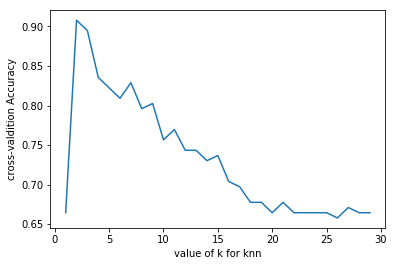

In [322]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")




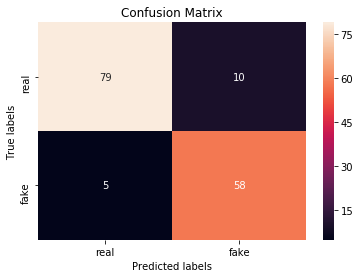

In [318]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp4- Tf-Idf + Preprocessed text + Stemming

In [324]:

x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier())])


In [325]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_neighbors':range(1,30)
}

In [326]:

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__n_neighbors': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [327]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name,  [param_name]))


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ki',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'))]) 

	classifier__n_neighbors: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [328]:

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[79 10]
 [ 5 58]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.94      0.89      0.91        89
           1       0.85      0.92      0.89        63

   micro avg       0.90      0.90      0.90       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.90      0.90      0.90       152
 

Train Accuracy 0.9956140350877193
Test Accuracy: 0.9013157894736842
roc_auc_score 0.9041376850365613


In [329]:
# plot represents the classifier accuracy and shows that the highest accuracy is as shown by gridSearchCv
K_rang=range(1,30)
K_score=[]
for k in K_rang:
    pipelineTf_Idf = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 1))),
    ('classifier', KNeighborsClassifier(k))])
    
    model=pipelineTf_Idf.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    K_score.append(accuracy_score(Y_test, y_pred))
for i in K_score:
    print(i)

0.75
0.9276315789473685
0.9078947368421053
0.8289473684210527
0.8355263157894737
0.8092105263157895
0.8157894736842105
0.7894736842105263
0.7960526315789473
0.7631578947368421
0.7697368421052632
0.7631578947368421
0.7828947368421053
0.7368421052631579
0.743421052631579
0.7105263157894737
0.7171052631578947
0.7039473684210527
0.7039473684210527
0.7039473684210527
0.7105263157894737
0.6842105263157895
0.6973684210526315
0.6710526315789473
0.6710526315789473
0.6644736842105263
0.6710526315789473
0.6644736842105263
0.6644736842105263


Text(0, 0.5, 'cross-valdition Accuracy')

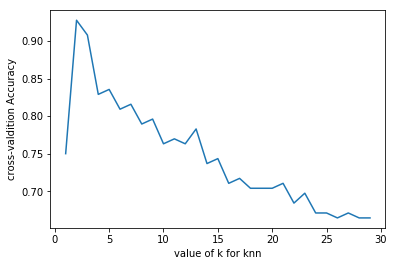

In [330]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")




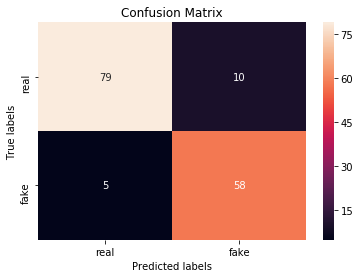

In [331]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

# Multinomial Naïve Bayes Classifier 

In [41]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), prepro...one, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]) 

	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [43]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[77 12]
 [ 8 55]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.91      0.87      0.89        89
           1       0.82      0.87      0.85        63

   micro avg       0.87      0.87      0.87       152
   macro avg       0.86      0.87      0.87       152
weighted avg       0.87      0.87      0.87       152
 

Train Accuracy 0.9912280701754386
Test Accuracy: 0.868421052631579
roc_auc_score 0.8690922061708578


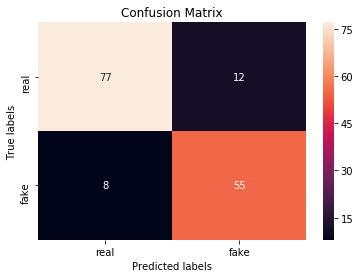

In [44]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp2: Bow + Preprocessed text +Stemming


In [45]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
}

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), prepro...one, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]) 

	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [47]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[79 10]
 [ 7 56]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.92      0.89      0.90        89
           1       0.85      0.89      0.87        63

   micro avg       0.89      0.89      0.89       152
   macro avg       0.88      0.89      0.89       152
weighted avg       0.89      0.89      0.89       152
 

Train Accuracy 0.9890350877192983
Test Accuracy: 0.8881578947368421
roc_auc_score 0.8882646691635455


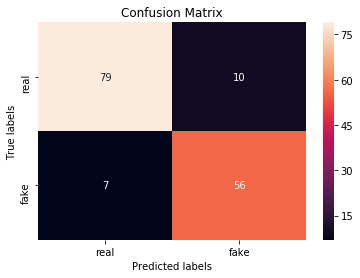

In [48]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp3- Tf-Idf+ Preprocessed text 


In [51]:

x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
}

In [52]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]) 

	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [54]:
confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[81  8]
 [10 53]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.89      0.91      0.90        89
           1       0.87      0.84      0.85        63

   micro avg       0.88      0.88      0.88       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.88      0.88      0.88       152
 

Train Accuracy 0.9890350877192983
Test Accuracy: 0.881578947368421
roc_auc_score 0.8756911004102016


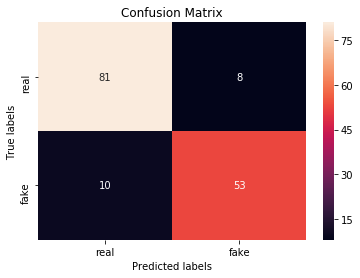

In [55]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp4- Tf-Idf + Preprocessed text + Stemming

In [56]:

x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())])


In [57]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
}

In [58]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]) 

	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [60]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[82  7]
 [10 53]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.89      0.92      0.91        89
           1       0.88      0.84      0.86        63

   micro avg       0.89      0.89      0.89       152
   macro avg       0.89      0.88      0.88       152
weighted avg       0.89      0.89      0.89       152
 

Train Accuracy 0.9890350877192983
Test Accuracy: 0.8881578947368421
roc_auc_score 0.8813090779382915


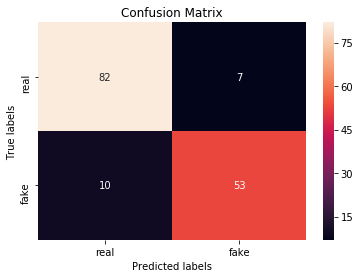

In [61]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' '); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

# Support Vector Machine Classifier 

Exp1: Bow + Preprocessed text

In [344]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', SVC(kernel='linear'))])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__C':[0.01,0.1,1,10]
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [345]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]) 

	classifier__C: 0.1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [346]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[88  1]
 [ 7 56]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.93      0.99      0.96        89
           1       0.98      0.89      0.93        63

   micro avg       0.95      0.95      0.95       152
   macro avg       0.95      0.94      0.94       152
weighted avg       0.95      0.95      0.95       152
 

Train Accuracy 0.9912280701754386
Test Accuracy: 0.9473684210526315
roc_auc_score 0.9388264669163545


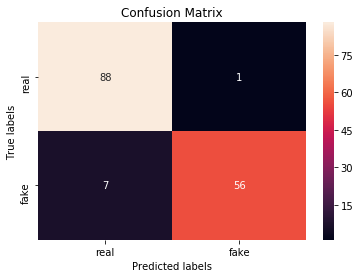

In [347]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp2: Bow + Preprocessed text +Stemming


In [348]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', SVC(kernel='linear'))])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__C':[0.01,0.1,1,10]
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [349]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]) 

	classifier__C: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [350]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[87  2]
 [ 6 57]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.94      0.98      0.96        89
           1       0.97      0.90      0.93        63

   micro avg       0.95      0.95      0.95       152
   macro avg       0.95      0.94      0.95       152
weighted avg       0.95      0.95      0.95       152
 

Train Accuracy 0.9978070175438597
Test Accuracy: 0.9473684210526315
roc_auc_score 0.9411449973247724


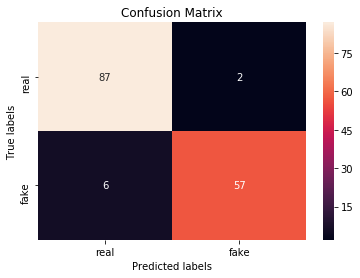

In [351]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp3- Tf-Idf+ Preprocessed text 


In [352]:

x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', SVC(kernel='linear'))])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__C':[0.01,0.1,1,10]
}

In [353]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [354]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]) 

	classifier__C: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [355]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[86  3]
 [ 6 57]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.93      0.97      0.95        89
           1       0.95      0.90      0.93        63

   micro avg       0.94      0.94      0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152
 

Train Accuracy 0.9890350877192983
Test Accuracy: 0.9407894736842105
roc_auc_score 0.9355270197966827


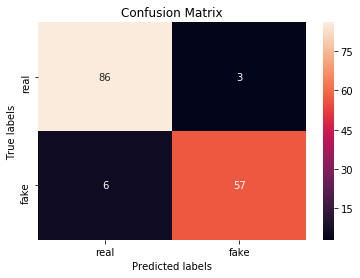

In [356]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp4- Tf-Idf + Preprocessed text + Stemming

In [359]:

x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', SVC(kernel='linear'))])


In [360]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__C':[0.01,0.1,1,10]
}

In [361]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [362]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]) 

	classifier__C: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [363]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[86  3]
 [ 5 58]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.95      0.97      0.96        89
           1       0.95      0.92      0.94        63

   micro avg       0.95      0.95      0.95       152
   macro avg       0.95      0.94      0.95       152
weighted avg       0.95      0.95      0.95       152
 

Train Accuracy 0.993421052631579
Test Accuracy: 0.9473684210526315
roc_auc_score 0.9434635277331905


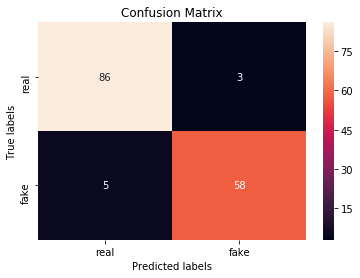

In [364]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

# Decision Tree Classifier


Exp1: Bow + Preprocessed text

In [68]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

BoW=CountVectorizer(stop_words='english')
X_train=BoW.fit_transform(X_train)
X_test= BoW.transform(X_test)

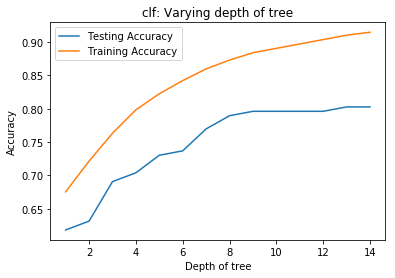

In [69]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 15)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(random_state=42,max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, Y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, Y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [79]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42,max_depth=9))])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [81]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
# check the performance of model on both, train and validation. If training accuracy 
#is extremely high and testing is not the same, then the model is overfitting.
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[83  6]
 [22 41]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.79      0.93      0.86        89
           1       0.87      0.65      0.75        63

   micro avg       0.82      0.82      0.82       152
   macro avg       0.83      0.79      0.80       152
weighted avg       0.82      0.82      0.81       152
 

Train Accuracy 0.8618421052631579
Test Accuracy: 0.8157894736842105
roc_auc_score 0.791688960228286


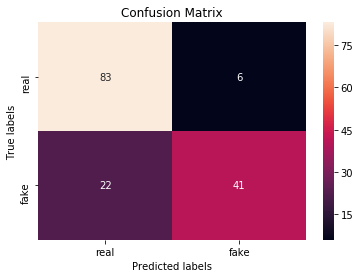

In [82]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp2: Bow + Preprocessed text +Stemming


In [68]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

BoW=CountVectorizer(stop_words='english')
X_train=BoW.fit_transform(X_train)
X_test= BoW.transform(X_test)

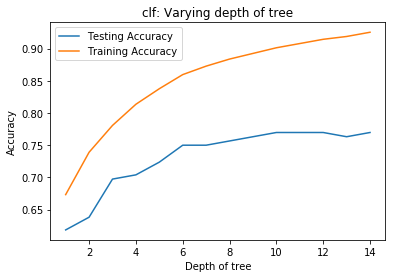

In [71]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 15)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(random_state=42,max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, Y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, Y_test)

# Generate plot
plt.title('clf:  ')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [73]:

x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42,max_depth=6))])



In [74]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [75]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [76]:

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[80  9]
 [29 34]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.73      0.90      0.81        89
           1       0.79      0.54      0.64        63

   micro avg       0.75      0.75      0.75       152
   macro avg       0.76      0.72      0.72       152
weighted avg       0.76      0.75      0.74       152
 

Train Accuracy 0.8596491228070176
Test Accuracy: 0.75
roc_auc_score 0.7192794720884608


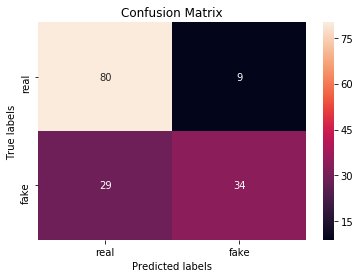

In [77]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp3- Tf-Idf+ Preprocessed text 


In [60]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

BoW=TfidfVectorizer(stop_words='english')
X_train=BoW.fit_transform(X_train)
X_test= BoW.transform(X_test)



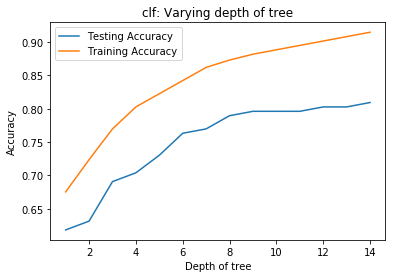

In [61]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 15)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(random_state=42,max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, Y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, Y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [46]:

x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42,max_depth=9))])


In [47]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
}

In [48]:

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [50]:

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[83  6]
 [25 38]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.77      0.93      0.84        89
           1       0.86      0.60      0.71        63

   micro avg       0.80      0.80      0.80       152
   macro avg       0.82      0.77      0.78       152
weighted avg       0.81      0.80      0.79       152
 

Train Accuracy 0.881578947368421
Test Accuracy: 0.7960526315789473
roc_auc_score 0.7678794364187623


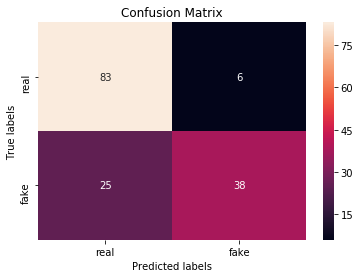

In [51]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp4- Tf-Idf + Preprocessed text + Stemming 

In [64]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

BoW=TfidfVectorizer(stop_words='english')
X_train=BoW.fit_transform(X_train)
X_test= BoW.transform(X_test)

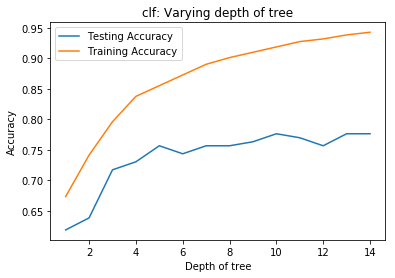

In [67]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 15)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(random_state=42,max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, Y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, Y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [54]:


x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42,max_depth= 5))])


In [55]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
}

In [56]:

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))



Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [58]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[79 10]
 [27 36]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.75      0.89      0.81        89
           1       0.78      0.57      0.66        63

   micro avg       0.76      0.76      0.76       152
   macro avg       0.76      0.73      0.74       152
weighted avg       0.76      0.76      0.75       152
 

Train Accuracy 0.8552631578947368
Test Accuracy: 0.756578947368421
roc_auc_score 0.7295345104333868


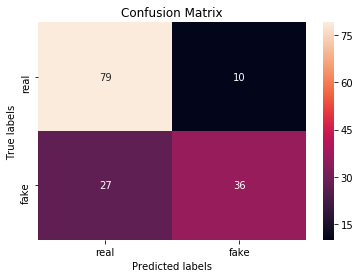

In [59]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);